In [1]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import json

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests
import re

from selenium import webdriver

from time    import sleep , time
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비
# import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

# conda install -c conda-forge python-graphviz
# pip install graphviz

import graphviz
import missingno as msno

# ml
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer , load_digits

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier , export_graphviz

from   sklearn.ensemble        import RandomForestClassifier , VotingClassifier

from   sklearn.linear_model    import LogisticRegression

from   sklearn.svm             import SVC

from   sklearn.neighbors        import KNeighborsClassifier

from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , precision_recall_curve  ,  roc_curve , roc_auc_score
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler , Binarizer
from   sklearn.impute          import SimpleImputer

from   sklearn.base            import BaseEstimator

from   IPython.display import Image

import xgboost as xgb
from   xgboost import plot_importance
from   xgboost import XGBClassifier

from lightgbm import LGBMClassifier
from lightgbm import plot_importance
import lightgbm as light

from imblearn.over_sampling import SMOTE
sklearn.__version__

'0.24.2'

In [2]:
print(xgb.__version__)

1.5.1


In [3]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
def metrics_evaluation(target , prediction = None , prediction_prob = None) :
    print('confusion matrix \n' , confusion_matrix(target , prediction))
    print('*'*100)
    print('accuracy \n'    , accuracy_score(target , prediction))
    print('*'*100)
    print('recall \n'      , recall_score(target , prediction))
    print('*'*100)
    print('precision \n'   , precision_score(target , prediction))
    print('*'*100)
    print('f1 score \n'   , f1_score(target , prediction))

In [5]:
print(cancer.target_names)
cancer_frm = pd.DataFrame(data    = cancer.data ,
                          columns = cancer.feature_names)
cancer_frm['target'] = cancer.target
cancer_frm

['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
print( cancer.target_names )
print( cancer_frm['target'].value_counts() )

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [7]:
print('01. model -')
xgboost_model = XGBClassifier(n_estimators= 400,
                              learning_rate = 0.1,
                              max_depth = 3)
xgboost_model.get_params()

01. model -


{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_delta_step': None,
 'max_depth': 3,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 400,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [8]:
X_train , X_test , y_train , y_test = train_test_split(cancer.data ,
                                                       cancer.target ,
                                                       test_size = 0.2 ,
                                                       random_state = 100)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [9]:
xgboost_model.fit(X_train , y_train)
y_pred = xgboost_model.predict(X_test)
metrics_evaluation(y_test , y_pred)

[22:05:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix 
 [[46  3]
 [ 1 64]]
****************************************************************************************************
accuracy 
 0.9649122807017544
****************************************************************************************************
recall 
 0.9846153846153847
****************************************************************************************************
precision 
 0.9552238805970149
****************************************************************************************************
f1 score 
 0.9696969696969696


In [10]:
print('튜닝 - early stopping')
tuning_xgboost_model = XGBClassifier(n_estimators  = 400 ,
                              learning_rate = 0.1 ,
                              max_depth     = 3)


튜닝 - early stopping


In [11]:
tuning_xgboost_model.fit(X_train , y_train ,
                         early_stopping_rounds = 100 ,
                         eval_metric = 'logloss' ,
                         eval_set = [(X_test , y_test)] ,
                         verbose = True )


[0]	validation_0-logloss:0.61460
[1]	validation_0-logloss:0.55405
[2]	validation_0-logloss:0.49816
[3]	validation_0-logloss:0.44858
[4]	validation_0-logloss:0.40558
[5]	validation_0-logloss:0.37227
[6]	validation_0-logloss:0.34175
[7]	validation_0-logloss:0.31699
[8]	validation_0-logloss:0.29199
[9]	validation_0-logloss:0.27386
[10]	validation_0-logloss:0.25490
[11]	validation_0-logloss:0.23818
[12]	validation_0-logloss:0.22577
[13]	validation_0-logloss:0.21225
[14]	validation_0-logloss:0.20156
[15]	validation_0-logloss:0.19251
[16]	validation_0-logloss:0.18292
[17]	validation_0-logloss:0.17663
[18]	validation_0-logloss:0.17008
[19]	validation_0-logloss:0.16260
[20]	validation_0-logloss:0.15747
[21]	validation_0-logloss:0.15208
[22]	validation_0-logloss:0.14877
[23]	validation_0-logloss:0.14609
[24]	validation_0-logloss:0.14465
[25]	validation_0-logloss:0.14215
[26]	validation_0-logloss:0.13825
[27]	validation_0-logloss:0.13535
[28]	validation_0-logloss:0.13244
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
y_pred = tuning_xgboost_model.predict(X_test)
metrics_evaluation(y_test , y_pred)

confusion matrix 
 [[47  2]
 [ 1 64]]
****************************************************************************************************
accuracy 
 0.9736842105263158
****************************************************************************************************
recall 
 0.9846153846153847
****************************************************************************************************
precision 
 0.9696969696969697
****************************************************************************************************
f1 score 
 0.9770992366412214


피처 중요도 시각화 - 


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

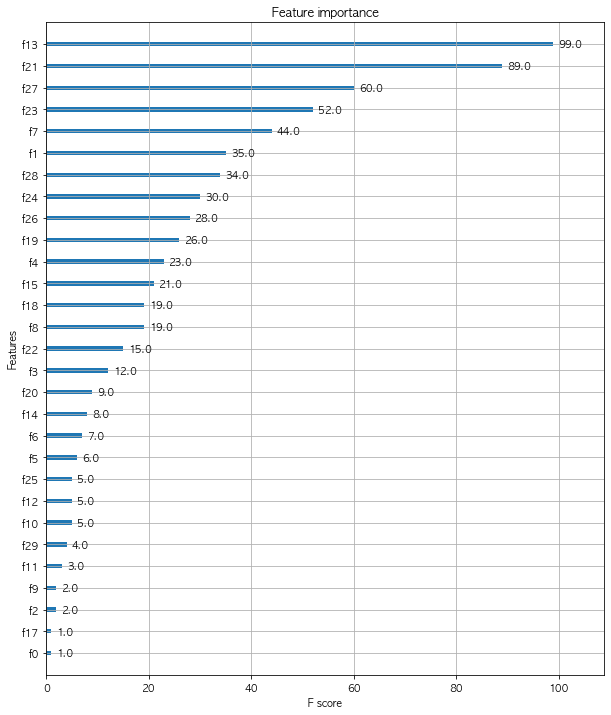

In [13]:
print('피처 중요도 시각화 - ')

fig , ax = plt.subplots( figsize = (10, 12))

xgb.plot_importance(tuning_xgboost_model , ax = ax )

In [14]:
from lightgbm import LGBMClassifier
import lightgbm as light

In [15]:
gbm_model =  LGBMClassifier(n_estimators  = 400 ,
                            learning_rate = 0.1 ,
                            max_depth     = 3)
gbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 400,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [16]:
gbm_model.fit(X_train , y_train ,
                         early_stopping_rounds = 100 ,
                         eval_metric = 'logloss' ,
                         eval_set = [(X_test , y_test)] ,
                         verbose = True )

[1]	valid_0's binary_logloss: 0.606017
[2]	valid_0's binary_logloss: 0.543372
[3]	valid_0's binary_logloss: 0.493337
[4]	valid_0's binary_logloss: 0.44766
[5]	valid_0's binary_logloss: 0.411436
[6]	valid_0's binary_logloss: 0.379522
[7]	valid_0's binary_logloss: 0.354103
[8]	valid_0's binary_logloss: 0.327011
[9]	valid_0's binary_logloss: 0.3033
[10]	valid_0's binary_logloss: 0.285218
[11]	valid_0's binary_logloss: 0.26974
[12]	valid_0's binary_logloss: 0.255245
[13]	valid_0's binary_logloss: 0.239979
[14]	valid_0's binary_logloss: 0.229394
[15]	valid_0's binary_logloss: 0.216446
[16]	valid_0's binary_logloss: 0.209389
[17]	valid_0's binary_logloss: 0.200332
[18]	valid_0's binary_logloss: 0.190267
[19]	valid_0's binary_logloss: 0.184193
[20]	valid_0's binary_logloss: 0.175653
[21]	valid_0's binary_logloss: 0.169701
[22]	valid_0's binary_logloss: 0.163806
[23]	valid_0's binary_logloss: 0.156058
[24]	valid_0's binary_logloss: 0.151248
[25]	valid_0's binary_logloss: 0.147774
[26]	valid_0'

LGBMClassifier(max_depth=3, n_estimators=400)

In [1]:
y_pred = gbm_model.predict(X_test)
metrics_evaluation(y_test, y_pred)

NameError: name 'gbm_model' is not defined

In [2]:
print('예측 확률값을 반환하고 예측값을 변환')

y_pred_proba = gbm_model.predict_proba(X_test)[ : , 1]
y_pred_proba

예측 확률값을 반환하고 예측값을 변환


NameError: name 'gbm_model' is not defined

In [3]:
print('AUC -', roc_auc_score(y_test, y_pred_proba))

NameError: name 'roc_auc_score' is not defined

In [4]:
print('피쳐중요도도 시각화 - ')

flg, ax = plt.subplots(figsize = (10,12))

light.plot_importance(gbm_model, ax=ax)

피쳐중요도도 시각화 - 


NameError: name 'plt' is not defined

In [5]:
card_frm = pd.read_csv('./ml-data/classification-card.csv')
card_frm.head()

NameError: name 'pd' is not defined

In [6]:
copy_card_frm = card_frm.copy()


NameError: name 'card_frm' is not defined

In [7]:
copy_card_frm.drop('Time', axis =1, inplace = True)
copy_card_frm

NameError: name 'copy_card_frm' is not defined

In [8]:
print('데이터 세트 분리 - ')

features = copy_card_frm.iloc[: , :-1]
target = copy_card_frm.iloc[:, -1]

print('학습, 테스트 데이터세트의 레이블값 비율 ')

print(target.value_counts()/target.shape[0]*100)

데이터 세트 분리 - 


NameError: name 'copy_card_frm' is not defined

In [9]:
X_train , X_test , y_train , y_test = train_test_split(features,
                                                       target ,
                                                       test_size = 0.2 ,
                                                       random_state = 100)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

NameError: name 'train_test_split' is not defined

In [10]:
def metrics_evaluation(target , prediction = None , prediction_prob = None) :
    print('confusion matrix \n' , confusion_matrix(target , prediction))
    print('*'*100)
    print('accuracy \n'    , accuracy_score(target , prediction))
    print('*'*100)
    print('recall \n'      , recall_score(target , prediction))
    print('*'*100)
    print('precision \n'   , precision_score(target , prediction))
    print('*'*100)
    print('f1 score \n'   , f1_score(target , prediction))

In [11]:
print('LogisticRegression - 학습, 평가, 예측 ')
logstic_model = LogisticRegression()
logstic_model.fit(X_train, y_train)
y_pred = logstic_model.predict(X_test)
y_prob = logstic_model.predict_proba(X_test)[:-1]
metrics_evaluation(y_test, y_pred, y_prob)

LogisticRegression - 학습, 평가, 예측 


NameError: name 'LogisticRegression' is not defined

In [ ]:
def model_train_eval(model , feature_train = None , feature_test = None , target_train = None , target_test = None) :
    model.fit(feature_train , target_train)
    pred       = model.predict(feature_test)
    pred_proba = model.predict_proba(feature_test)[ :  , 1]

    metrics_evaluation(target_test , pred , pred_proba )

In [1]:
print('LightGBM 학습/예측/평가 - ')
print('레이블값이 불균형 분포를 이루는 경우 재현률 및 정밀도 , AUC 성능이 매우 저하됨을 확인 할 수 있다!!!')
gbm_model =  LGBMClassifier(n_estimators  = 400 ,
                            learning_rate = 0.1 ,
                            max_depth     = 3)
model_train_eval(gbm_model , feature_train = X_train , feature_test = X_test , target_train = y_train , target_test = y_test)

LightGBM 학습/예측/평가 - 
레이블값이 불균형 분포를 이루는 경우 재현률 및 정밀도 , AUC 성능이 매우 저하됨을 확인 할 수 있다!!!


NameError: name 'LGBMClassifier' is not defined

In [3]:
print('밀도분포를 이요한 금액에 대한 분포 시각화 - ')

plt.figure( figsize = (15,5))

sns.distplot(card_copy_frm['Amount'])


plt.xticks(range(0, 30000, 500) , rotation = 60)
plt.show()
plt.close()

밀도분포를 이요한 금액에 대한 분포 시각화 - 


NameError: name 'plt' is not defined

In [4]:
print('정규분포 형태의 StandardScaler 를 이용한 Amount(drop) 피처변환 -> Amount_Scaled - ')
print('frm - insert(0 , feature_name , value )')

정규분포 형태의 StandardScaler 를 이용한 Amount(drop) 피처변환 -> Amount_Scaled - 
frm - insert(0 , feature_name , value )


In [5]:
s_scaler = StandardScaler()
card_copy_frm['Amount_Scaled'] = s_scaler.fit_transform(card_copy_frm[['Amount']])
# card_copy_frm.drop('Amount', axis=1, inplace=True)
card_copy_frm.head()

NameError: name 'StandardScaler' is not defined

In [6]:
print('스케일 변환 후 기존 분류기를 활용해서 학습/예측/평가 - ')


스케일 변환 후 기존 분류기를 활용해서 학습/예측/평가 - 
